# Simulação Estocástica: Distribuição de Poisson

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Para gerarmos dados com uma distribuição de Poisson, podemos usar a biblioteca Numpy.

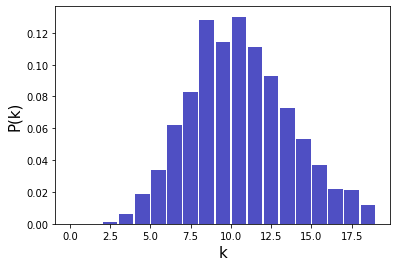

In [106]:
import numpy as np
import matplotlib.pyplot as plt

lbd = 10 # taxa
n = 1000 # numero de pontos extraídos de uma distribuição de Poisson
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))
count, bins, ignored = plt.hist(P, bins=k, density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

## Lei dos eventos raros

A distribuição de Poisson é obtida quando aumentamos o número de experimentos e a probabilidade e sucesso é próxima de zero.
$$
\lim_{n\rightarrow \infty, p\rightarrow 0} \frac{n!}{(n-k)!k!}p^k(1-p)^{n-k} = \frac{e^{-\lambda}\lambda^k}{k!}
$$

Na simulação abaixo, vemos que se diminuirmos a probabilidade de sucesso, a distribuição binomial se aproxima da Poisson.

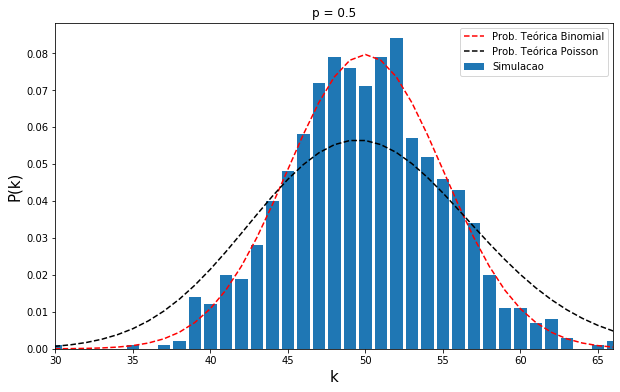

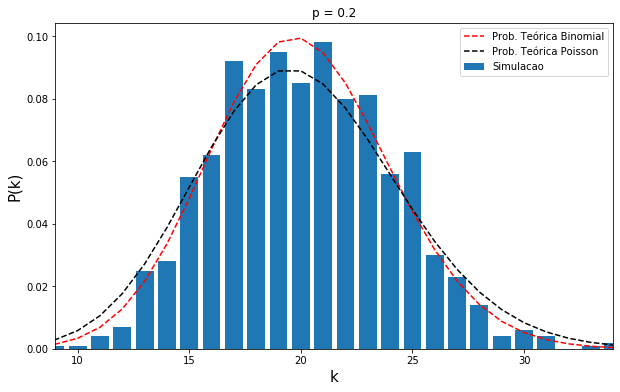

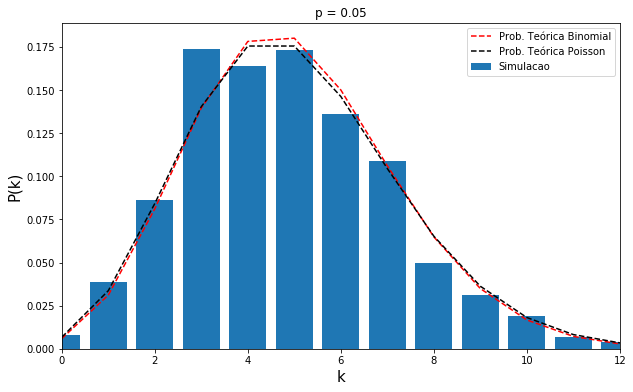

In [107]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.special import factorial

seed(100) # semente do gerador de números aleatórios

vp = [0.5, 0.2, 0.05] # probabilidade de sucesso
n = 100 # numero de experimentos
for p in vp:
    Pk = np.zeros(n)
    vk = np.arange(0,n)
    ns = 1000 # numero de simulacoes

    for j in range(0,ns): # faça para ns simulacoes
        S = 0 # numero de sucessos
        for i in range(0,n): # faça para n experimentos
            r = np.random.uniform() #
            if(r <= p): # se o sucesso
                S = S + 1
        Pk[S] = Pk[S] + 1
    Pk=Pk/sum(Pk) # normaliza a distribuição de probabilidade
    #plt.plot(vk, Pk, 'ro')
    plt.figure(figsize=(10,6))
    plt.xlim(np.min(vk[Pk>0]),np.max(vk[Pk>0]))
    plt.bar(vk, Pk, label='Simulacao')

    # curva teórica
    Pkt = np.zeros(n+1) # valores teóricos da probabilidade
    vkt = np.arange(0,n+1) # variação em k
    for k in range(0,n+1): # varia de 0 até n
        Pkt[k] = (factorial(n)/(factorial(n-k)*factorial(k)))*(p**k)*(1-p)**(n-k)
    plt.plot(vkt, Pkt, 'r--', label='Prob. Teórica Binomial')

    # curva teórica
    Po = np.zeros(n+1) # valores teóricos da probabilidade
    vo = np.arange(0,n+1) # variação em k
    lbd = n*p
    for k in range(0,n+1): # varia de 0 até n
        Po[k] = (np.exp(-lbd)*lbd**k)/factorial(k)
    plt.plot(vo, Po, 'k--', label='Prob. Teórica Poisson')
    plt.title('p = '+ str(p))
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('P(k)',fontsize = 15)
    plt.legend()
    plt.show(True)